In [11]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from IPython.display import display



In [12]:
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
news_data = pd.read_table('news_data.csv', delimiter='\t')

In [15]:
news_data

,2635.json,false,Says the Annies List political group supports third-trimester abortions on demand.,abortion,dwayne-bohac,State representative,Texas,republican,0,1,0.1,0.2,0.3,a mailer
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10234,5473.json,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report"""
10235,3408.json,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview
10236,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate
10237,2253.json,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...


In [16]:
news_data.drop(columns=['2635.json', 'abortion', 'dwayne-bohac', 'State representative', 'Texas', 'republican', '0', '1', '0.1', '0.2', '0.3', 'a mailer'], inplace=True)

In [17]:
news_data.head()

,false,Says the Annies List political group supports third-trimester abortions on demand.
0,half-true,When did the decline of coal start? It started...
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo..."
2,false,Health care reform legislation is likely to ma...
3,half-true,The economic turnaround started at the end of ...
4,true,The Chicago Bears have had more starting quart...


In [18]:
news_data.columns = ['label', 'news_text']

In [19]:
news_data.head()

,label,news_text
0,half-true,When did the decline of coal start? It started...
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo..."
2,false,Health care reform legislation is likely to ma...
3,half-true,The economic turnaround started at the end of ...
4,true,The Chicago Bears have had more starting quart...


In [20]:
news_data.shape

(10239, 2)

In [21]:
news_data.isnull().sum()

label        0
news_text    0
dtype: int64

In [22]:
each_label_count = news_data['label'].value_counts()

In [23]:
each_label_count

label
half-true      2114
false          1994
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: count, dtype: int64

In [24]:
news_data_half_true_only = news_data[news_data['label'] == 'half-true']
news_data_false_only = news_data[news_data['label'] == 'false']
news_data_mostly_true_only = news_data[news_data['label'] == 'mostly-true']
news_data_true_only = news_data[news_data['label'] == 'true']
news_data_barely_true_only = news_data[news_data['label'] == 'barely-true']
news_data_pants_fire_only = news_data[news_data['label'] == 'pants-fire']

In [25]:
news_data_half_true_only_sample = news_data_half_true_only[0:34]
news_data_false_only_sample = news_data_false_only[0:34]
news_data_mostly_true_only_sample = news_data_mostly_true_only[0:34]
news_data_true_only_sample = news_data_true_only[0:34]
news_data_barely_true_only_sample = news_data_barely_true_only[0:34]
news_data_pants_fire_only_sample = news_data_pants_fire_only[0:34]

In [26]:
new_news_dataset = pd.concat([news_data_half_true_only_sample, news_data_false_only_sample, news_data_mostly_true_only_sample, news_data_true_only_sample, news_data_barely_true_only_sample, news_data_pants_fire_only_sample], axis=0)

In [27]:
new_news_dataset.head()

,label,news_text
0,half-true,When did the decline of coal start? It started...
3,half-true,The economic turnaround started at the end of ...
6,half-true,I'm the only person on this stage who has work...
7,half-true,"However, it took $19.5 million in Oregon Lotte..."
10,half-true,"Since 2000, nearly 12 million Americans have s..."


In [28]:
new_news_dataset.shape

(204, 2)

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [32]:
ps = PorterStemmer()

NameError: name 'PorterStemmer' is not defined

In [33]:

from nltk.stem import PorterStemmer

ps = PorterStemmer()



In [34]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
import nltk
print(nltk.__version__)


3.9.1


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [38]:
vectorizer = TfidfVectorizer()

In [39]:
def preprocess_text(text):

  text = text.lower()

  text = nltk.word_tokenize(text)

  word_arr = []

  for i in text:
    if i.isalnum():
      word_arr.append(i)

  text = word_arr[:]

  word_arr.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      word_arr.append(i)

  text = word_arr[:]

  word_arr.clear()

  for i in text:
    word_arr.append(ps.stem(i))

  return " ".join(word_arr)

In [41]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Ensure nltk resources are downloaded
nltk.download('stopwords')

def preprocess_text(text):
    # Initialize the stemmer
    ps = PorterStemmer()
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    # Tokenize
    tokens = text.split()
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stem tokens
    tokens = [ps.stem(word) for word in tokens]
    
    # Join tokens back into a single string
    return ' '.join(tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
new_news_dataset['preprocessed_news_text'] = new_news_dataset['news_text'].apply(preprocess_text)

In [43]:
new_news_dataset.head()

,label,news_text,preprocessed_news_text
0,half-true,When did the decline of coal start? It started...,declin coal start start natur ga took start be...
3,half-true,The economic turnaround started at the end of ...,econom turnaround start end term
6,half-true,I'm the only person on this stage who has work...,im person stage work activ last year pass alon...
7,half-true,"However, it took $19.5 million in Oregon Lotte...",howev took million oregon lotteri fund port ne...
10,half-true,"Since 2000, nearly 12 million Americans have s...",sinc nearli million american slip middl class ...


In [44]:
new_news_dataset.drop(columns=['news_text', 'label'], inplace=True)

In [45]:
new_news_dataset.head()

,preprocessed_news_text
0,declin coal start start natur ga took start be...
3,econom turnaround start end term
6,im person stage work activ last year pass alon...
7,howev took million oregon lotteri fund port ne...
10,sinc nearli million american slip middl class ...


In [46]:
vectorizer = TfidfVectorizer()

In [47]:
X = vectorizer.fit_transform(new_news_dataset['preprocessed_news_text']).toarray()

In [48]:
pca = PCA(n_components=2, random_state=42)

In [49]:
X = pca.fit_transform(X)

In [50]:
wcss = []

for i in range(1, 11):

  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)

  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

In [51]:
wcss

[5.5027094533374505,
 3.393605013536202,
 1.9112063636945225,
 1.419178461215007,
 1.1836053687125292,
 0.8911772178716529,
 0.7876700946949368,
 0.7764259646295824,
 0.63482707812624,
 0.6019427173505013]

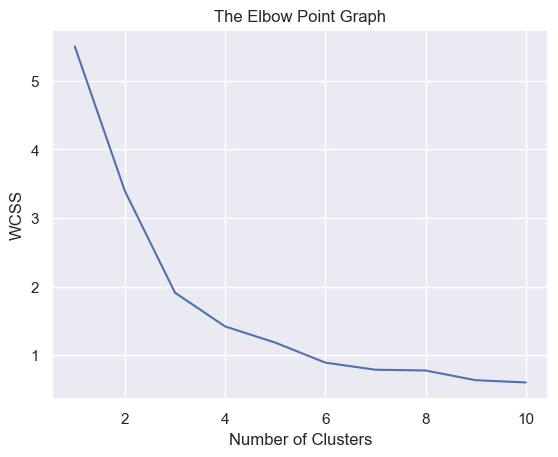

In [52]:
sns.set()

plt.plot(range(1, 11), wcss)

plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.show()

In [53]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)

In [54]:
kmeans.fit_predict(X)

array([3, 1, 3, 1, 3, 0, 4, 5, 1, 5, 0, 1, 0, 3, 1, 5, 1, 3, 2, 3, 1, 4,
       1, 5, 2, 5, 3, 1, 1, 3, 3, 2, 3, 3, 1, 1, 1, 1, 5, 3, 5, 1, 3, 5,
       3, 4, 1, 5, 5, 5, 3, 1, 3, 1, 1, 5, 3, 3, 1, 1, 1, 2, 5, 1, 1, 1,
       1, 1, 1, 5, 4, 1, 3, 3, 3, 1, 0, 4, 0, 0, 1, 1, 1, 1, 5, 5, 1, 1,
       1, 3, 1, 1, 1, 3, 1, 1, 4, 1, 3, 1, 1, 1, 1, 1, 5, 1, 3, 1, 3, 1,
       2, 1, 1, 3, 4, 5, 5, 1, 1, 1, 4, 1, 2, 5, 1, 5, 1, 1, 1, 3, 3, 1,
       1, 4, 1, 5, 1, 1, 5, 5, 3, 5, 1, 1, 1, 5, 1, 2, 5, 3, 1, 5, 4, 2,
       1, 0, 5, 5, 1, 2, 1, 5, 4, 3, 1, 1, 1, 3, 5, 1, 1, 5, 5, 1, 3, 5,
       2, 5, 3, 3, 3, 1, 1, 5, 1, 5, 1, 1, 1, 3, 1, 1, 1, 1, 5, 1, 4, 1,
       1, 1, 1, 1, 1, 5])

In [55]:
kmeans_labels = kmeans.labels_

In [56]:
kmeans_labels

array([3, 1, 3, 1, 3, 0, 4, 5, 1, 5, 0, 1, 0, 3, 1, 5, 1, 3, 2, 3, 1, 4,
       1, 5, 2, 5, 3, 1, 1, 3, 3, 2, 3, 3, 1, 1, 1, 1, 5, 3, 5, 1, 3, 5,
       3, 4, 1, 5, 5, 5, 3, 1, 3, 1, 1, 5, 3, 3, 1, 1, 1, 2, 5, 1, 1, 1,
       1, 1, 1, 5, 4, 1, 3, 3, 3, 1, 0, 4, 0, 0, 1, 1, 1, 1, 5, 5, 1, 1,
       1, 3, 1, 1, 1, 3, 1, 1, 4, 1, 3, 1, 1, 1, 1, 1, 5, 1, 3, 1, 3, 1,
       2, 1, 1, 3, 4, 5, 5, 1, 1, 1, 4, 1, 2, 5, 1, 5, 1, 1, 1, 3, 3, 1,
       1, 4, 1, 5, 1, 1, 5, 5, 3, 5, 1, 1, 1, 5, 1, 2, 5, 3, 1, 5, 4, 2,
       1, 0, 5, 5, 1, 2, 1, 5, 4, 3, 1, 1, 1, 3, 5, 1, 1, 5, 5, 1, 3, 5,
       2, 5, 3, 3, 3, 1, 1, 5, 1, 5, 1, 1, 1, 3, 1, 1, 1, 1, 5, 1, 4, 1,
       1, 1, 1, 1, 1, 5])

Text(0.5, 1.0, 'Kmeans Clustering')

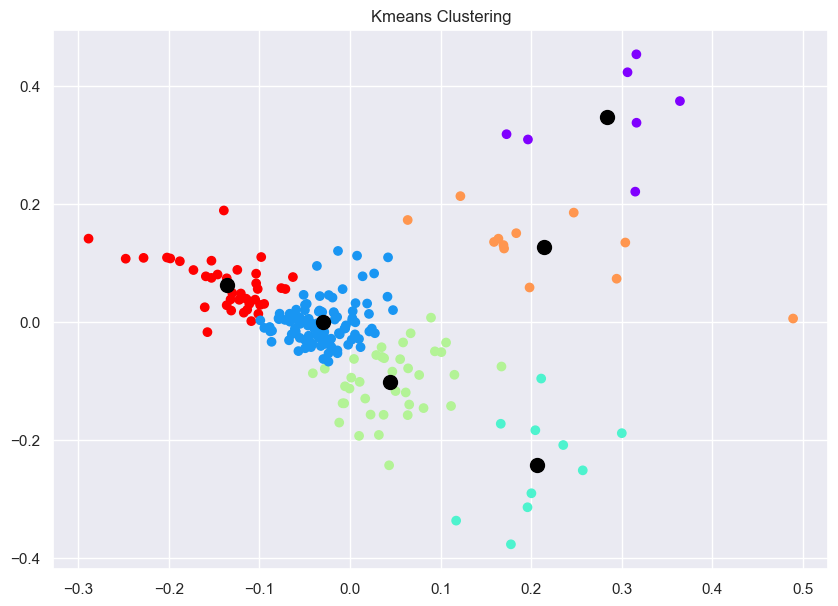

In [57]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='centroid')
plt.title('Kmeans Clustering')

In [58]:
silhouette_score_kmeans  = silhouette_score(X, kmeans_labels)

In [59]:
silhouette_score_kmeans

0.42650089249638357

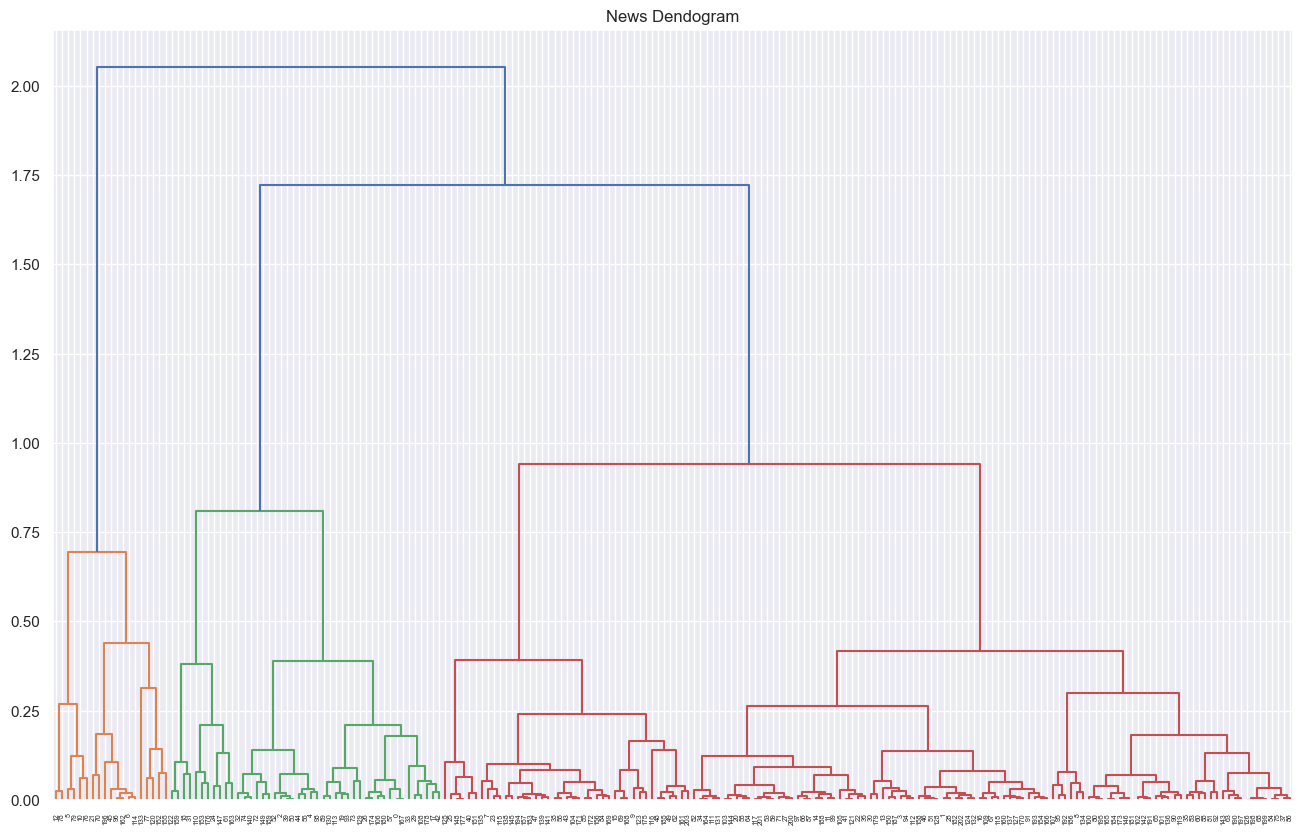

In [60]:
plt.figure(figsize=(16, 10))

plt.title('News Dendogram')

dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [62]:
from sklearn.cluster import AgglomerativeClustering

In [73]:
cluster_hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward') 


In [76]:
hiearachy_labels= cluster_hierarchical.fit_predict(X) 

In [81]:
hiearachy_labels = cluster_hierarchical.labels_

Text(0.5, 1.0, 'Agglomerative Hierarical Clustering')

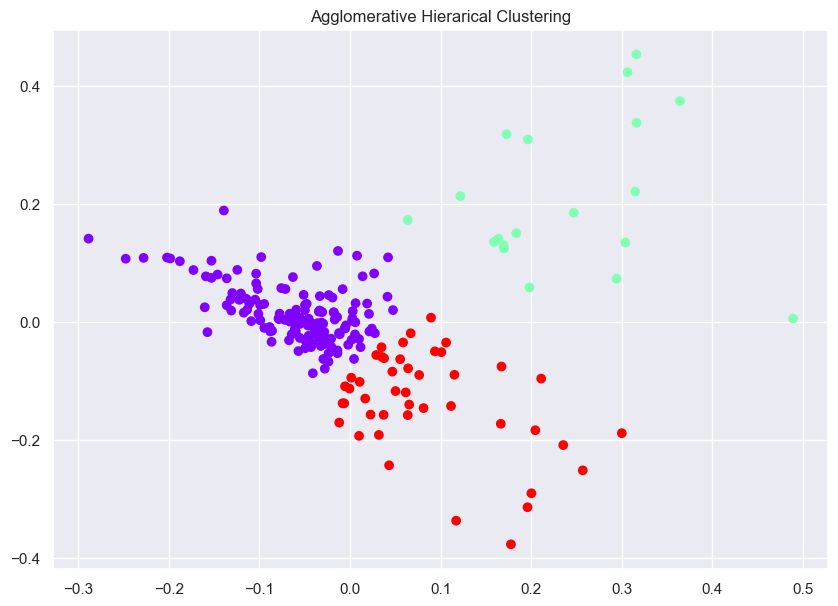

In [82]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=hiearachy_labels, cmap='rainbow')
plt.title('Agglomerative Hierarical Clustering')

In [83]:
silhouette_score_hierarchy = silhouette_score(X, hiearachy_labels)

In [84]:
silhouette_score_hierarchy

0.5024123812401696

In [85]:
silhoutte_score_df = pd.DataFrame({
    'Algorithm': ['k-means Clustering', 'k-means Clustering', 'Agglomerative Hierarical Clustering'],
    'Silhouette Score': [silhouette_score_kmeans, silhouette_score_kmeans, silhouette_score_hierarchy]
})

In [86]:
silhoutte_score_df

,Algorithm,Silhouette Score
0,k-means Clustering,0.426501
1,k-means Clustering,0.426501
2,Agglomerative Hierarical Clustering,0.502412


In [87]:
sample_data_true = 'The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.'
sample_data_false = 'Health care reform legislation is likely to mandate free sex change surgeries.'
sample_data_half_true = 'When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.'
sample_data_mostly_true = 'Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."'
sample_data_barely_true = 'Jim Dunnam has not lived in the district he represents for years now.'
sample_data_pants_fire = 'In the case of a catastrophic event, the Atlanta-area offices of the Centers for Disease Control and Prevention will self-destruct.'

In [88]:
sample_data_true_preproccessed = preprocess_text(sample_data_true)
sample_data_false_preproccessed = preprocess_text(sample_data_false)
sample_data_half_true_preproccessed = preprocess_text(sample_data_half_true)
sample_data_mostly_true_preproccessed = preprocess_text(sample_data_mostly_true)
sample_data_barely_true_preproccessed = preprocess_text(sample_data_barely_true)
sample_data_pants_fire_preproccessed = preprocess_text(sample_data_pants_fire)

In [89]:
sample_data_true_vectorized = vectorizer.transform([sample_data_true_preproccessed]).toarray()
sample_data_false_vectorized = vectorizer.transform([sample_data_false_preproccessed]).toarray()
sample_data_half_true_vectorized = vectorizer.transform([sample_data_half_true_preproccessed]).toarray()
sample_data_mostly_true_vectorized = vectorizer.transform([sample_data_mostly_true_preproccessed]).toarray()
sample_data_barely_true_vectorized = vectorizer.transform([sample_data_barely_true_preproccessed]).toarray()
sample_data_pants_fire_vectorized = vectorizer.transform([sample_data_pants_fire_preproccessed]).toarray()

In [90]:
sample_data_true_pca = pca.transform(sample_data_barely_true_vectorized)
sample_data_false_pca = pca.transform(sample_data_false_vectorized)
sample_data_half_true_pca = pca.transform(sample_data_half_true_vectorized)
sample_data_mostly_true_pca = pca.transform(sample_data_mostly_true_vectorized)
sample_data_barely_true_pca = pca.transform(sample_data_barely_true_vectorized)
sample_data_pants_fire_pca = pca.transform(sample_data_pants_fire_vectorized)

In [91]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=42)

In [92]:
kmeans.fit_predict(X)

array([2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 0,
       1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 2,
       1, 0, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1])

In [93]:
pred_single_data = kmeans.predict(sample_data_false_pca)

In [96]:
pred_single_data[0]

1

In [97]:
#creating streamlit setup
